In [1]:
import os
os.chdir("../")
from eval import *

Random seed set to 333


In [2]:

# Example usage:
amplitudes = [-10, -5, -2, -1, 1, 2, 5, 10]
series = []
cusum_results = []
rolling_results = []

for amp in amplitudes:
    x = np.concatenate([
        np.random.normal(0, 1, 50),
        np.random.normal(amp, 1, 50)
    ])
    series.append(x)
    
    # Get both magnitude and direction
    cusum_mag = cusum_range(x)
    roll_mag = rolling_mean_shift(x)
    
    cusum_results.append((cusum_mag))
    rolling_results.append((roll_mag))
# Print results
print("\nResults for different shift amplitudes:")
print(f"{'Amplitude':>10} {'CUSUM':>10} {'Rolling':>10}")
for amp, cusum, roll in zip(amplitudes, cusum_results, rolling_results):
    print(f"{amp:10d} {cusum:10.2f} {roll:10.2f}")


Results for different shift amplitudes:
 Amplitude      CUSUM    Rolling
       -10      -2.45      -1.09
        -5      -1.19      -0.76
        -2      -0.60       0.32
        -1      -0.28      -0.34
         1      -0.25       0.50
         2       0.44       0.44
         5       1.34       0.90
        10       2.51       1.22


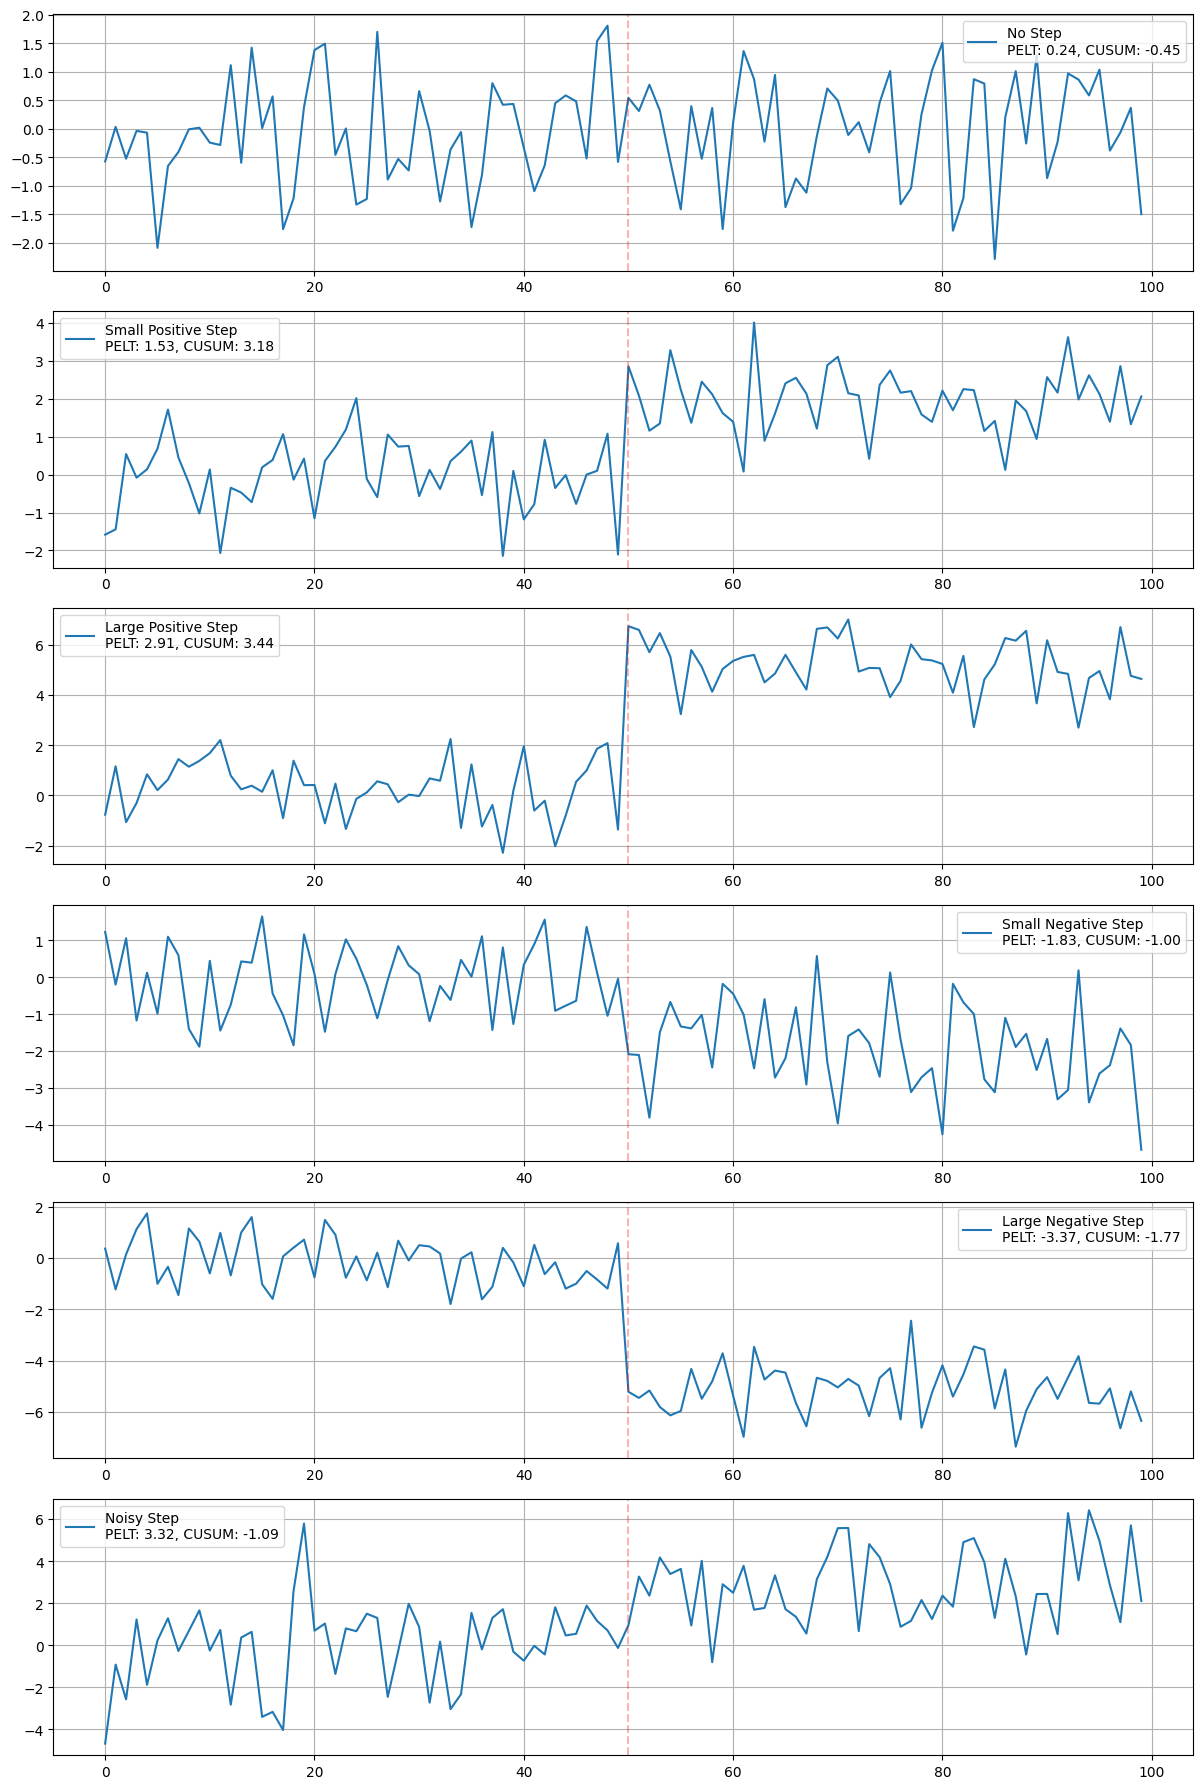


Step Detection Results:
Case                       PELT      CUSUM
---------------------------------------------
No Step                    0.24      -0.45
Small Positive Step        1.53       3.18
Large Positive Step        2.91       3.44
Small Negative Step       -1.83      -1.00
Large Negative Step       -3.37      -1.77
Noisy Step                 3.32      -1.09


In [3]:


# Generate test cases
test_cases = [
    # (name, amplitude, noise_std)
    ("No Step", 0, 1),
    ("Small Positive Step", 2, 1),
    ("Large Positive Step", 5, 1),
    ("Small Negative Step", -2, 1),
    ("Large Negative Step", -5, 1),
    ("Noisy Step", 3, 2)
]

# Create figure
fig, axes = plt.subplots(len(test_cases), 1, figsize=(12, 3*len(test_cases)))
if len(test_cases) == 1:
    axes = [axes]

# Test each case
results = []
for i, (name, amp, noise) in enumerate(test_cases):
    # Generate time series
    x = np.concatenate([
        np.random.normal(0, noise, 50),
        np.random.normal(amp, noise, 50)
    ])
    
    # Calculate metrics
    pelt_result = step_shift(x)
    cusum_result = cusum_step(x)
    
    # Store results
    results.append((name, pelt_result, cusum_result))
    
    # Plot
    axes[i].plot(x, label=f'{name}\nPELT: {pelt_result:.2f}, CUSUM: {cusum_result:.2f}')
    axes[i].axvline(x=50, color='r', linestyle='--', alpha=0.3)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Print results
print("\nStep Detection Results:")
print(f"{'Case':<20} {'PELT':>10} {'CUSUM':>10}")
print("-" * 45)
for name, pelt, cusum in results:
    print(f"{name:<20} {pelt:10.2f} {cusum:10.2f}")

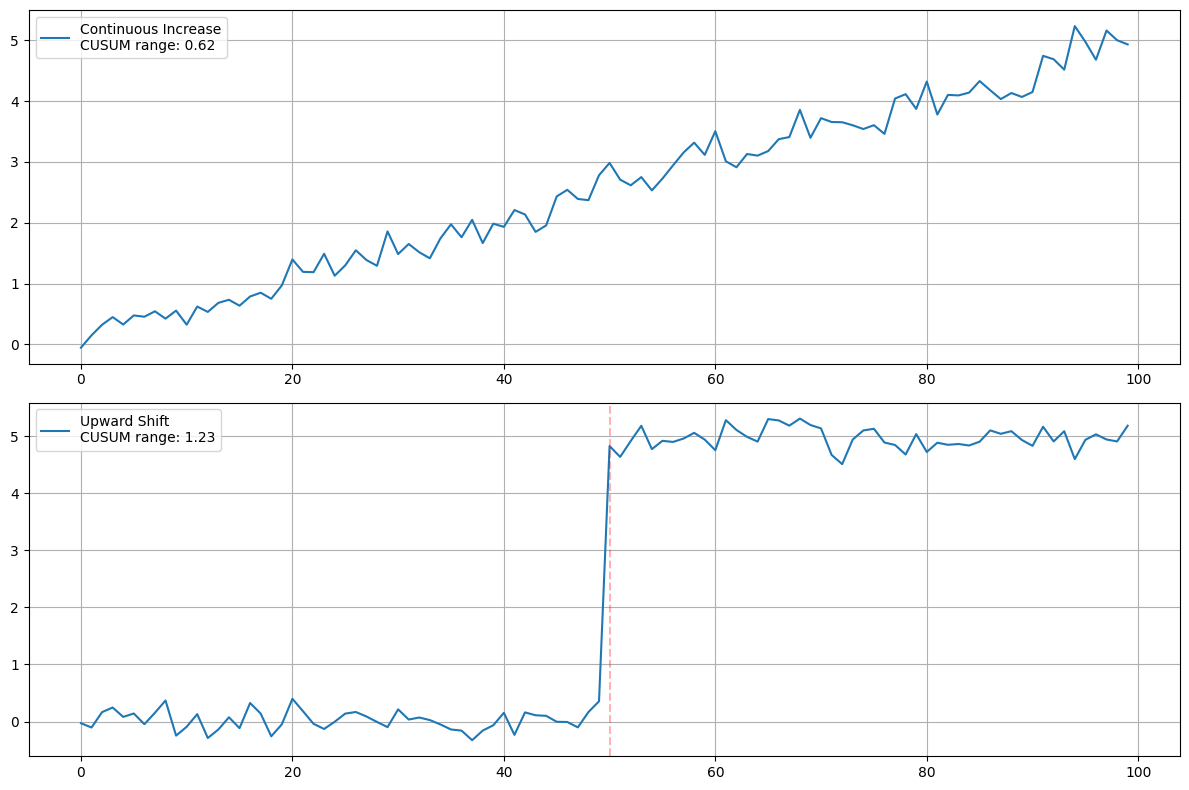


CUSUM Range Comparison:
Pattern              CUSUM Range
------------------------------
Continuous Increase        0.62
Upward Shift               1.23


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time series
# 1. Continuous increase
x_continuous = np.linspace(0, 5, 100) + np.random.normal(0, 0.2, 100)

# 2. Upward shift
x_shift = np.concatenate([
    np.random.normal(0, 0.2, 50),
    np.random.normal(5, 0.2, 50)
])

# Calculate CUSUM ranges
def cusum_range(x):
    """CUSUM range and direction: returns (range, direction) where direction is 1 for positive shift, -1 for negative"""
    cumsum = np.cumsum(x - x.mean())
    max_idx = np.argmax(cumsum)
    min_idx = np.argmin(cumsum)
    
    # Determine direction based on which comes first
    if max_idx > min_idx:
        direction = 1  # Positive shift
    else:
        direction = -1  # Negative shift
    
    return np.ptp(cumsum)*direction/len(x)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot continuous increase
ax1.plot(x_continuous, label=f'Continuous Increase\nCUSUM range: {cusum_range(x_continuous):.2f}')
ax1.legend()
ax1.grid(True)

# Plot upward shift
ax2.plot(x_shift, label=f'Upward Shift\nCUSUM range: {cusum_range(x_shift):.2f}')
ax2.axvline(x=50, color='r', linestyle='--', alpha=0.3)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print results
print("\nCUSUM Range Comparison:")
print(f"{'Pattern':<20} {'CUSUM Range':>10}")
print("-" * 30)
print(f"{'Continuous Increase':<20} {cusum_range(x_continuous):10.2f}")
print(f"{'Upward Shift':<20} {cusum_range(x_shift):10.2f}")